<a href="https://colab.research.google.com/github/FGalvao77/An-lise-da-taxa-de-rotatividade-Churn-rate/blob/main/An%C3%A1lise_da_taxa_de_rotatividade_%7C_Churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise da taxa de rotatividade | Churn rate**
---
---

Já é de ciência de todos que vivemos atualmente a chamada `era da informação`, e a geração de grande volume de dados (_Big Data_) é parte dessa movimento. 

Empresas que têm a cultura _data driven_, ou seja, utilizam dados para extrair informações para tomar melhores decisões  estratégicas e assim maximizar seus resultados também faz parte desse contexto, e esse novo _paradigma_ se tornou um **mantra** de sobrevivência para qualquer organização atual.

E a _taxa de retenção_ de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de `churn`.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv'
)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv',
    index_col=0
)

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


> **DICIONÁRIO DE DADOS**
---

No conjunto de dados temos as seguinte variáveis:

- CustomerId: identificação do cliente;

- Surname: sobrenome do cliente;

- CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;

- Geography: país que o serviço é oferecido;

- Gender: sexo do cliente;

- Age: idade do cleinte;

- Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade;

- Balance: saldo da conta corrente;

- NumOfProducts: número de produtos bancários adquiridos;

- HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);

- IsActiveMember: se é um cliente com conta ativa, (Ativo = 1);

- EstimatedSalary: salário estimado;

- Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).

In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# sns.set()
plt.style.use('fivethirtyeight')

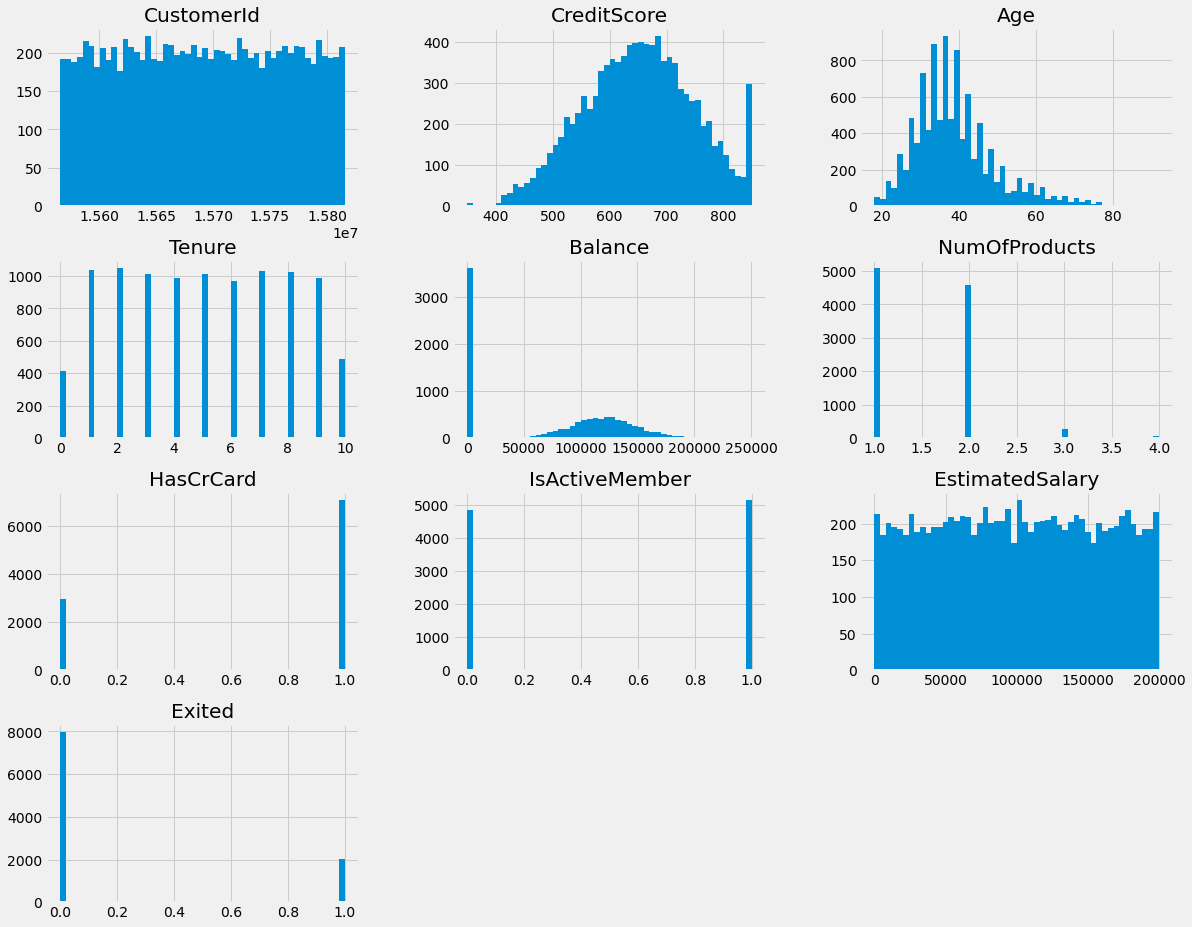

In [11]:
df.hist(figsize=(18, 15), bins=50);

In [12]:
df_copy = df.copy()

In [13]:
df_copy['Exited_cat'] = df_copy['Exited'].replace([0, 1], ['No', 'Yes'])

x_count = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

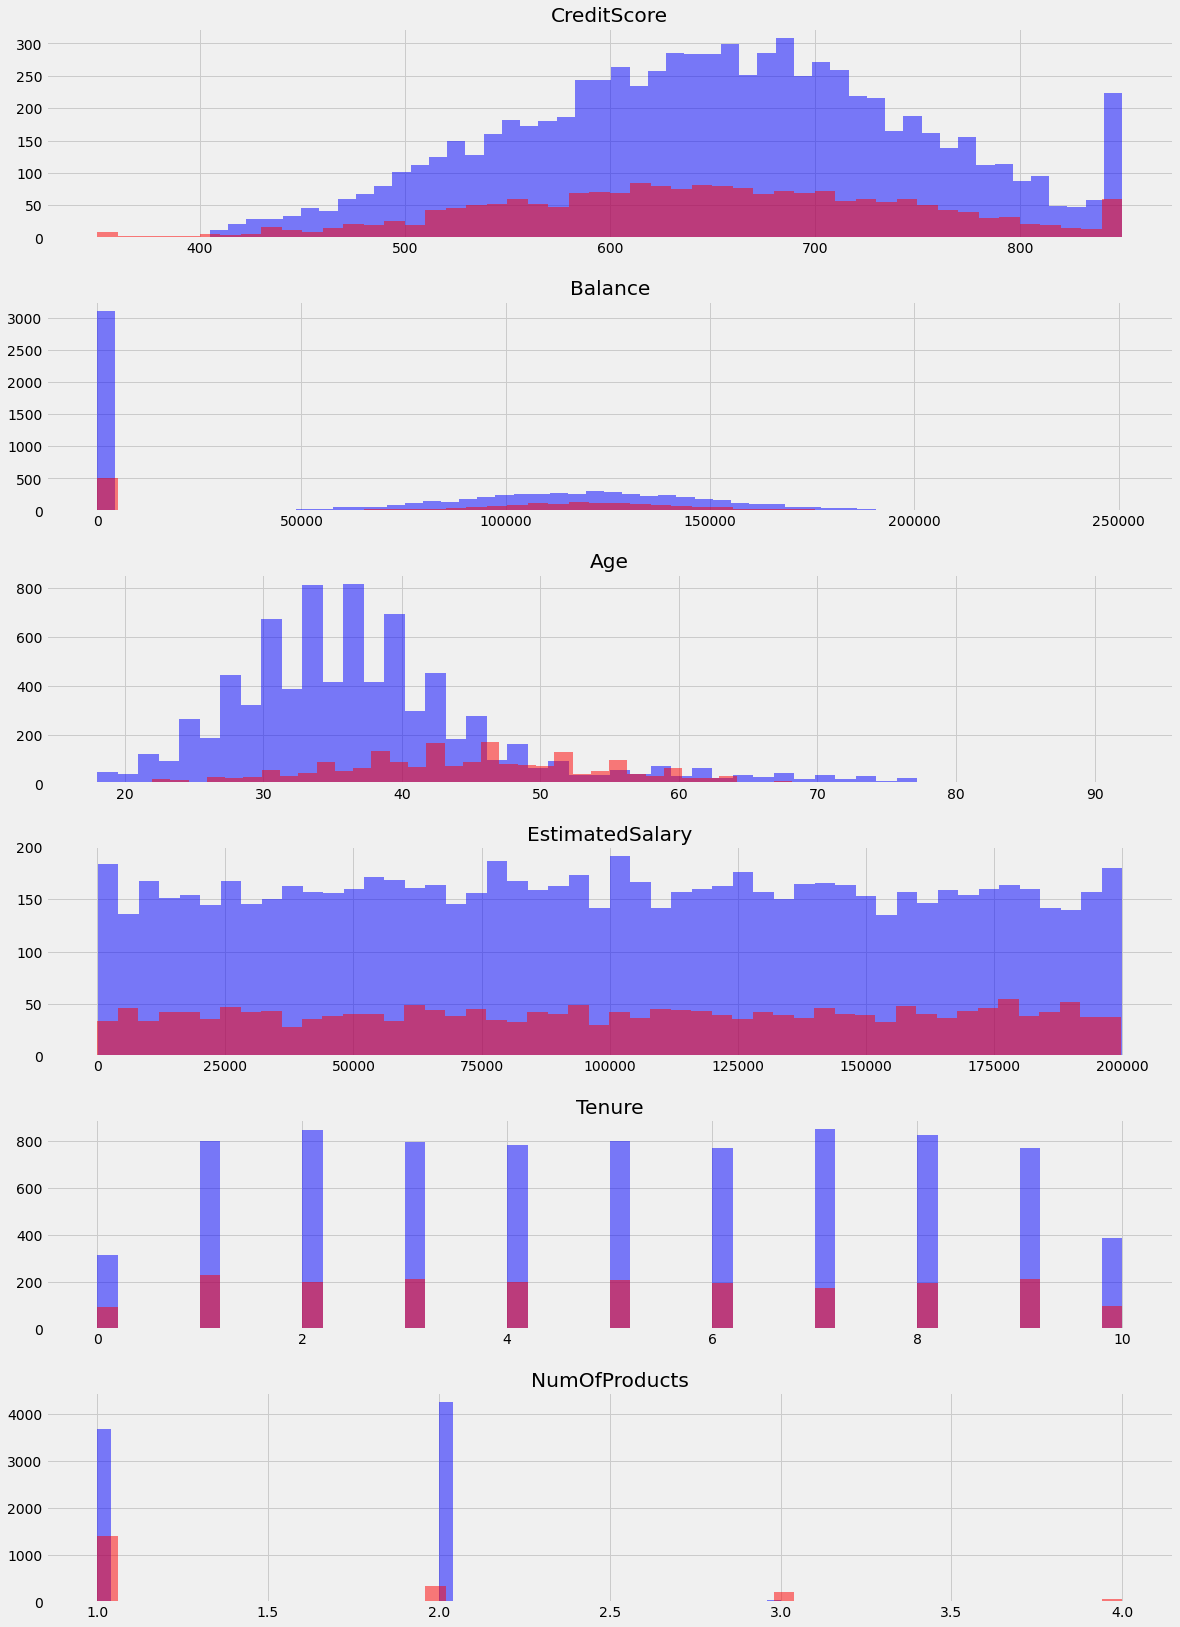

In [14]:
fig, ax = plt.subplots(6, 1, figsize=(18, 27))

df_copy[df_copy['Exited_cat'] == 'No'][x_count].hist(bins=50, color='blue', 
                                                     alpha=0.5, ax=ax)
df_copy[df_copy['Exited_cat'] == 'Yes'][x_count].hist(bins=50, color='red', 
                                                      alpha=0.5, ax=ax)

plt.show()

In [15]:
red_ = '#CD5C5C'
blue_ = '#6495ED'
green_ = '#90EE90'

cols= [red_, blue_, green_]

In [16]:
df_copy['Exited'].sum() / df_copy['Exited'].count()

0.2037

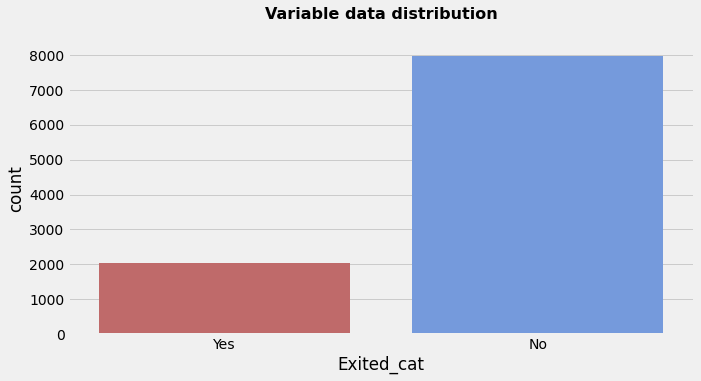

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_copy, x='Exited_cat', palette=cols)
plt.title('Variable data distribution\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.show()

In [18]:
# df['Gender'] = df['Gender'].replace(['Female', 'Male'], [0, 1])

In [19]:
df_genderXexited = df_copy.groupby('Gender').Exited.mean().reset_index()

df_genderXexited

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


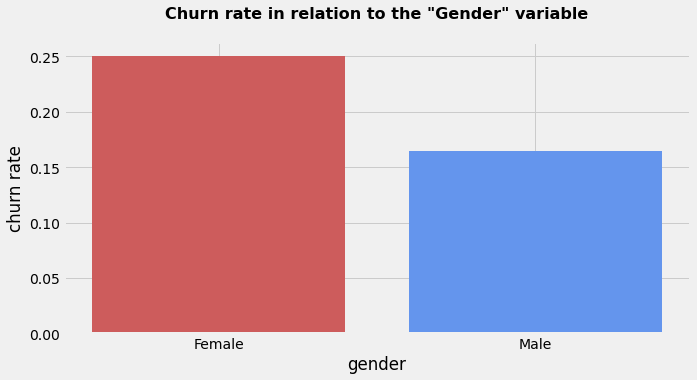

In [20]:
x = df_genderXexited['Gender']
y = df_genderXexited['Exited']

plt.figure(figsize=(10, 5))
plt.bar(x, y, color=cols)
plt.title('Churn rate in relation to the "Gender" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('gender')
plt.ylabel('churn rate')
plt.show()

In [21]:
df_geographyXexited = df_copy.groupby('Geography').Exited.mean().reset_index()

df_geographyXexited

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


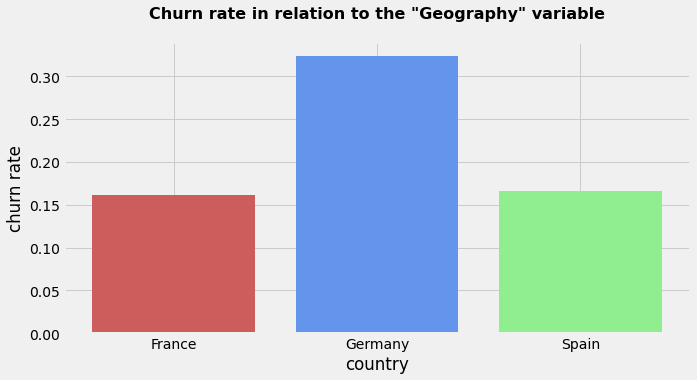

In [22]:
x = df_geographyXexited['Geography']
y = df_geographyXexited['Exited']

plt.figure(figsize=(10, 5))
plt.bar(x, y, color=cols)
plt.title('Churn rate in relation to the "Geography" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('country')
plt.ylabel('churn rate')
plt.show()

In [23]:
df_hasCardXexited = df_copy.groupby('HasCrCard').Exited.mean().reset_index()

df_hasCardXexited = df_hasCardXexited.replace([0, 1], ['No', 'Yes'])
df_hasCardXexited

,HasCrCard,Exited
0,No,0.208149
1,Yes,0.201843


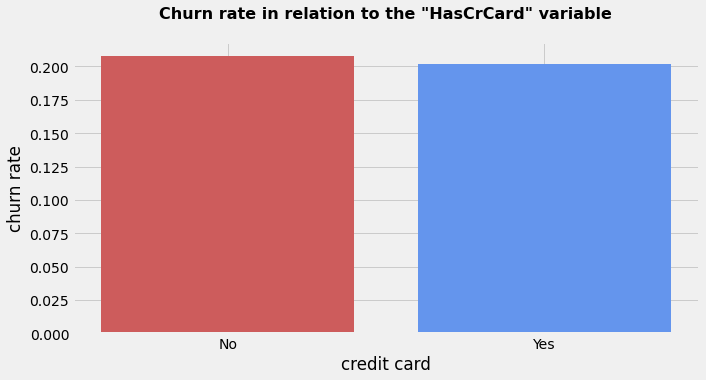

In [24]:
x = df_hasCardXexited['HasCrCard']
y = df_hasCardXexited['Exited']

plt.figure(figsize=(10, 5))
plt.bar(x, y, color=cols)
plt.title('Churn rate in relation to the "HasCrCard" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('credit card')
plt.ylabel('churn rate')
plt.show()

In [25]:
df_isActiveXexited = df_copy.groupby('IsActiveMember').Exited.mean().reset_index()

df_isActiveXexited = df_isActiveXexited.replace([0, 1], ['No', 'Yes'])
df_isActiveXexited

,IsActiveMember,Exited
0,No,0.268509
1,Yes,0.142691


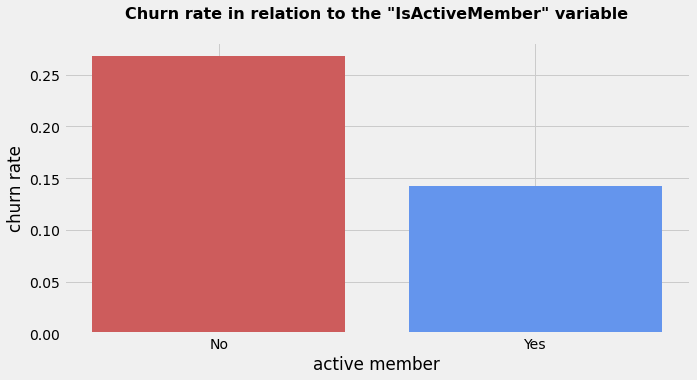

In [26]:
x = df_isActiveXexited['IsActiveMember']
y = df_isActiveXexited['Exited']

plt.figure(figsize=(10, 5))
plt.bar(x, y, color=cols)
plt.title('Churn rate in relation to the "IsActiveMember" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('active member')
plt.ylabel('churn rate')
plt.show()

In [27]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
df.select_dtypes(exclude='O')

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,36,7,0.00,1,0,1,42085.58,1


In [29]:
df_select = df.select_dtypes(exclude='O')

df_select.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [30]:
cols = ['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']

In [31]:
df_select = df_select[cols]

In [32]:
df_select.head()

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
RowNumber,,,,,
1,42,0.00,2,1,101348.88
2,41,83807.86,1,1,112542.58
3,42,159660.80,8,3,113931.57
4,39,0.00,1,2,93826.63
5,43,125510.82,2,1,79084.10


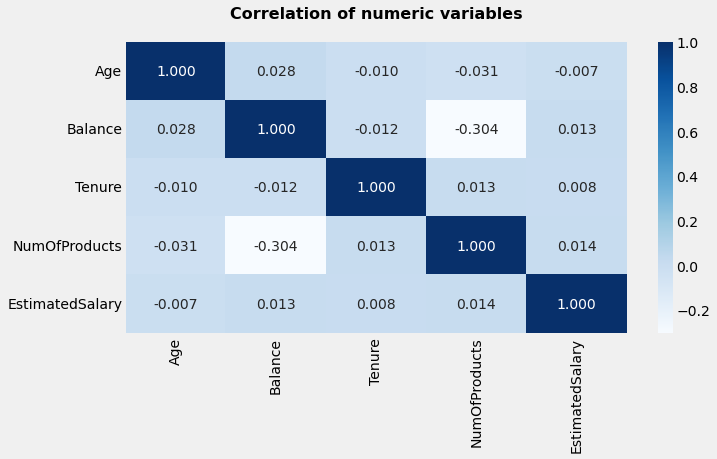

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Correlation of numeric variables\n', 
          {'fontsize': 16,'fontweight': 'bold'})
sns.heatmap(data=df_select.corr(), annot=True, cmap='Blues', fmt='0.3f')
plt.show()

In [34]:
df_numOfProductsXexited = df_copy.groupby('NumOfProducts').Exited.mean().reset_index()

df_numOfProductsXexited

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


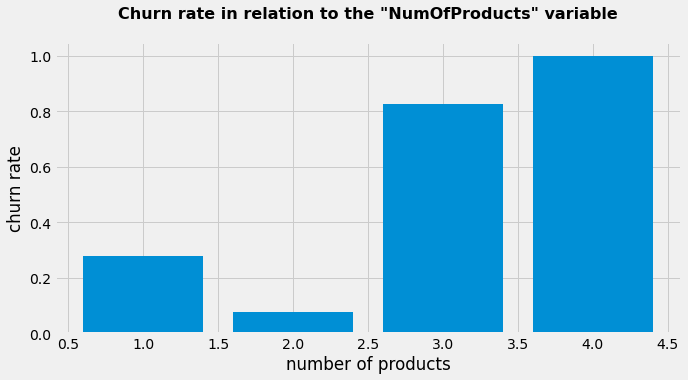

In [35]:
x = df_numOfProductsXexited['NumOfProducts']
y = df_numOfProductsXexited['Exited']


plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.title('Churn rate in relation to the "NumOfProducts" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('number of products')
plt.ylabel('churn rate')
plt.show()

In [36]:
df_tenureXexited = df_copy.groupby('Tenure').Exited.mean().reset_index()

df_tenureXexited

,Tenure,Exited
0,0,0.230024
1,1,0.224155
2,2,0.191794
3,3,0.211100
4,4,0.205258
5,5,0.206522
6,6,0.202689
7,7,0.172179
8,8,0.192195
9,9,0.216463


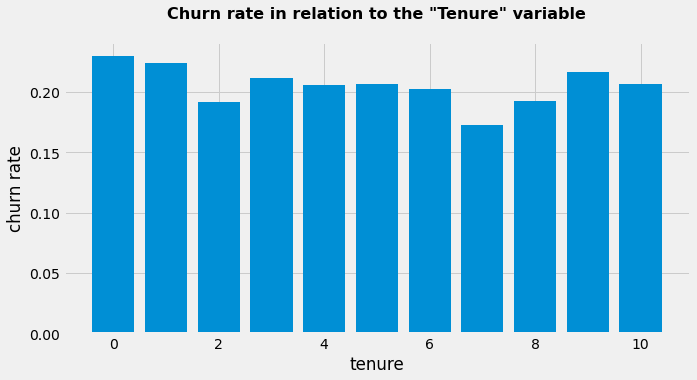

In [37]:
x = df_tenureXexited['Tenure']
y = df_tenureXexited['Exited']

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.title('Churn rate in relation to the "Tenure" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('tenure')
plt.ylabel('churn rate')
plt.show()

Exited_cat
No     72745.296779
Yes    91108.539337
Name: Balance, dtype: float64




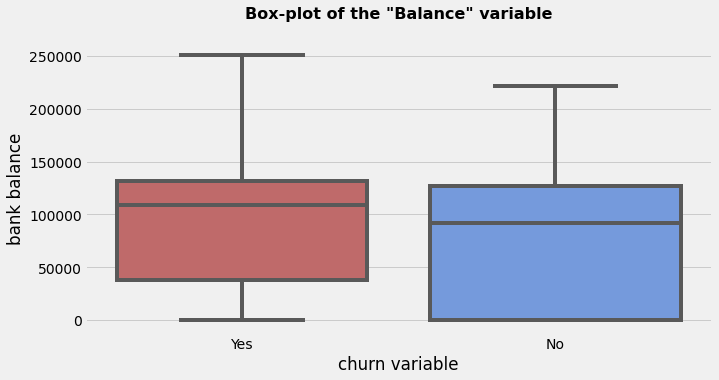

In [38]:
cols = [red_, blue_, green_]

print(df_copy.groupby(['Exited_cat'])['Balance'].mean())
print('\n')

plt.figure(figsize=(10, 5))
sns.boxplot(x='Exited_cat', y='Balance', data=df_copy, palette=cols)
plt.title('Box-plot of the "Balance" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('churn variable')
plt.ylabel('bank balance')
plt.show();

Exited_cat
No      99738.391772
Yes    101465.677531
Name: EstimatedSalary, dtype: float64




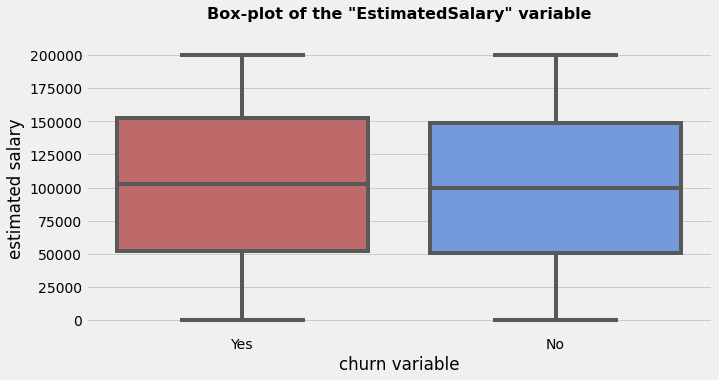

In [39]:
print(df_copy.groupby(['Exited_cat'])['EstimatedSalary'].mean())
print('\n')

plt.figure(figsize=(10, 5))
sns.boxplot(x='Exited_cat', y='EstimatedSalary', data=df_copy, palette=cols)
plt.title('Box-plot of the "EstimatedSalary" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('churn variable')
plt.ylabel('estimated salary')
plt.show();

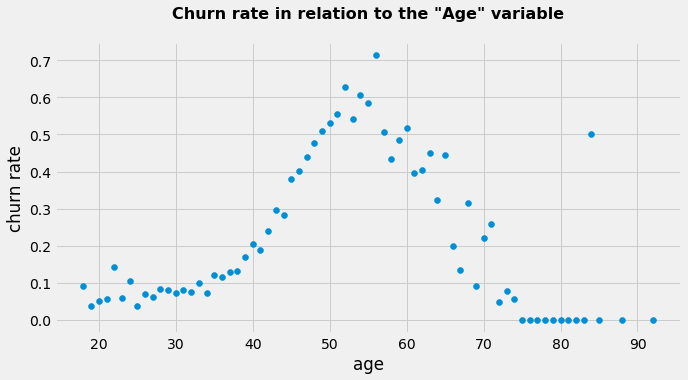

In [40]:
df_ageXexited = df.groupby('Age').Exited.mean().reset_index()

x = df_ageXexited['Age']
y = df_ageXexited['Exited']

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title('Churn rate in relation to the "Age" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('age')
plt.ylabel('churn rate')
plt.show();

Exited_cat
No     37.408389
Yes    44.837997
Name: Age, dtype: float64




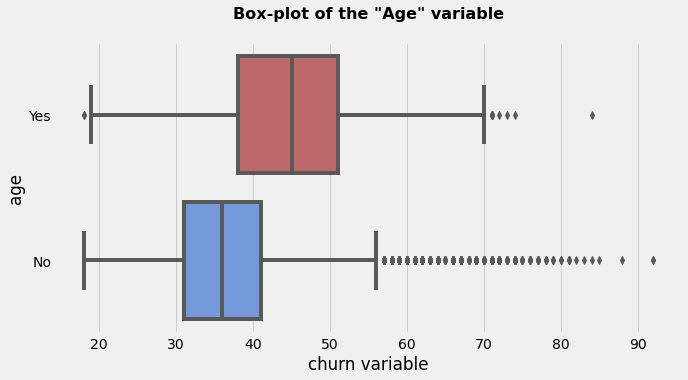

In [41]:
print(df_copy.groupby(['Exited_cat'])['Age'].mean())
print('\n')

plt.figure(figsize=(10, 5))
# sns.boxplot(x='Exited_cat', y='Age', data=df_copy, palette=cols)
sns.boxplot(y='Exited_cat', x='Age', data=df_copy, palette=cols)
plt.title('Box-plot of the "Age" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('churn variable')
plt.ylabel('age')
plt.show();

Exited_cat
No     651.853196
Yes    645.351497
Name: CreditScore, dtype: float64




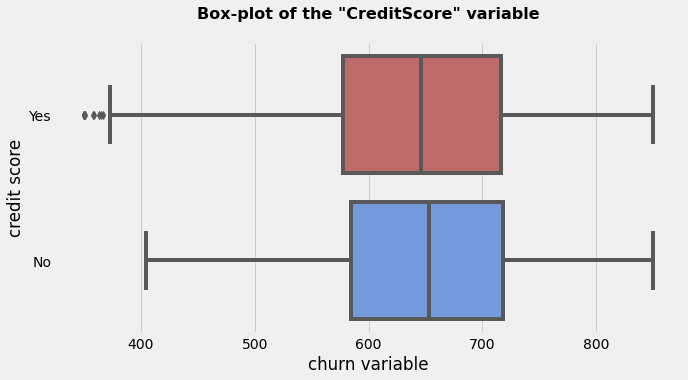

In [42]:
print(df_copy.groupby(['Exited_cat'])['CreditScore'].mean())
print('\n')

plt.figure(figsize=(10, 5))
# sns.boxplot(x='Exited_cat', y='CreditScore', data=df_copy, palette=cols)
sns.boxplot(y='Exited_cat', x='CreditScore', data=df_copy, palette=cols)
plt.title('Box-plot of the "CreditScore" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('churn variable')
plt.ylabel('credit score')
plt.show();

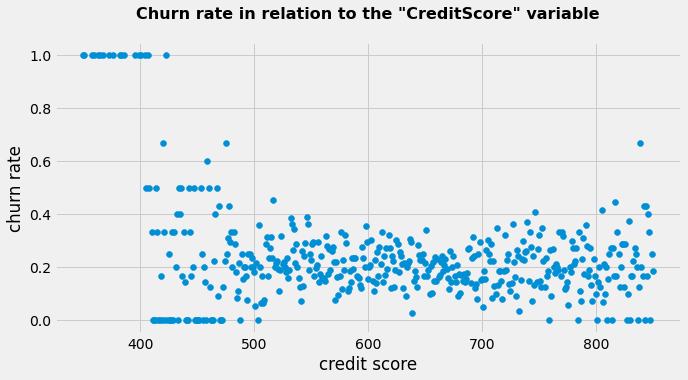

In [43]:
df_ageXexited = df.groupby('CreditScore').Exited.mean().reset_index()

x = df_ageXexited['CreditScore']
y = df_ageXexited['Exited']

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title('Churn rate in relation to the "CreditScore" variable\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('credit score')
plt.ylabel('churn rate')
plt.show();

In [44]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
X = df.drop(['CustomerId', 'Surname', 'Exited'], axis=1)

In [46]:
X[:15]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
7,822,France,Male,50,7,0.00,2,1,1,10062.80
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
9,501,France,Male,44,4,142051.07,2,0,1,74940.50


In [47]:
y = df['Exited']

In [48]:
y[:15]

RowNumber
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
Name: Exited, dtype: int64

In [49]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [50]:
# continuous l_vars = X.select_dtypes(exclude='O')
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

continuous_vars

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [51]:
categorical_vars = list(set(X) - set(continuous_vars))

categorical_vars

['Geography', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Gender']

In [52]:
dummies_vars = X[categorical_vars]

dummies_vars[:15]

,Geography,HasCrCard,IsActiveMember,NumOfProducts,Gender
RowNumber,,,,,
1,France,1,1,1,Female
2,Spain,0,1,1,Female
3,France,1,0,3,Female
4,France,0,0,2,Female
5,Spain,1,1,1,Female
6,Spain,1,0,2,Male
7,France,1,1,2,Male
8,Germany,1,0,4,Female
9,France,0,1,2,Male


Para as variáveis categóricas com apenas duas classes utilizaremos a função `Label Encoder()` do **Scikit-learn**, para transformar colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

- Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino. Após aplicar a função, os valores serão transformados em **1** e **0**.

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()

X['Gender'] = le.fit_transform(X['Gender'])

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,0,42,2,0.00,1,1,1,101348.88
2,608,Spain,0,41,1,83807.86,1,0,1,112542.58
3,502,France,0,42,8,159660.80,3,1,0,113931.57
4,699,France,0,39,1,0.00,2,0,0,93826.63
5,850,Spain,0,43,2,125510.82,1,1,1,79084.10


Para as variáveis categóricas com múltiplas categorias, utilizaremos o método `get_dummies()` do _Pandas_. Esse método transforma uma variável em variável _dummy_, ou seja, ele cria novas colunas de variáveis transformando a variável em binária, ou seja, atribui **0** e **1**.

- Por exemplo, a variável país possuí três categorias, França, Espanha e Alemanha. A função get_dummies() transforma cada categoria em uma nova variável binária, ou seja,

 - Variável França: se o cliente for da França 1 e 0 caso contrário.
 - Variável Alemanha: se o cliente for da Alemanha 1 e 0 caso contrário.
 - Variável Espanha; se o cliente for da Espanha 1 e 0 caso contrário.

Observe o conjunto de dados após aplicar a função **get_dummies()**.

In [55]:
X_final = pd.get_dummies(data=X, columns=['Geography', 'NumOfProducts'])

X_final.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
2,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
3,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
4,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
5,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0


In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

X_final[continuous_vars] = scaler.fit_transform(X_final[continuous_vars])

In [58]:
X_final

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,,,
1,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,0,0,1,0,0,0
2,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,1,1,0,0,0
3,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
4,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,1,0,0,0,1,0,0
5,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.842,1,0.283784,0.5,0.000000,1,0,0.481341,1,0,0,0,1,0,0
9997,0.332,1,0.229730,1.0,0.228657,1,1,0.508490,1,0,0,1,0,0,0
9998,0.718,0,0.243243,0.7,0.000000,0,1,0.210390,1,0,0,1,0,0,0


In [59]:
X_final.describe()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.70550,0.515100,0.500441,0.501400,0.250900,0.247700,0.508400,0.459000,0.026600,0.006000
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.45584,0.499797,0.287580,0.500023,0.433553,0.431698,0.499954,0.498341,0.160919,0.077231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,1.00000,1.000000,0.500960,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,1.00000,1.000000,0.746955,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
from sklearn.model_selection import train_test_split as tts

In [61]:
X_train, X_val, y_train, y_val = tts(X_final, y,
                                     test_size=0.5, 
                                     random_state=0)

In [62]:
len(X_train), len(X_val), len(y_train), len(y_val)

(5000, 5000, 5000, 5000)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
y_predKNN = knn_model.predict(X_val)

print(pd.crosstab(y_val, 
                  y_predKNN, 
                  rownames=['Real'],
                  colnames=['Predict'], 
                  margins=True))

Predict     0    1   All
Real                    
0        3701  265  3966
1         619  415  1034
All      4320  680  5000


In [66]:
import numpy as np

error = []

for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_val)
    error.append(np.mean(pred_i != y_val))

error

[0.2276,
 0.1816,
 0.1894,
 0.1728,
 0.1768,
 0.1726,
 0.1734,
 0.1724,
 0.1724,
 0.1756,
 0.1734,
 0.1738,
 0.1718,
 0.1742,
 0.1728,
 0.1736,
 0.172,
 0.1738,
 0.1746,
 0.1748,
 0.1736,
 0.1762,
 0.175,
 0.1756,
 0.1754,
 0.1748,
 0.177,
 0.1778,
 0.1778,
 0.1762,
 0.178,
 0.1796,
 0.18,
 0.1814,
 0.1816,
 0.1842,
 0.1838,
 0.186,
 0.1842]

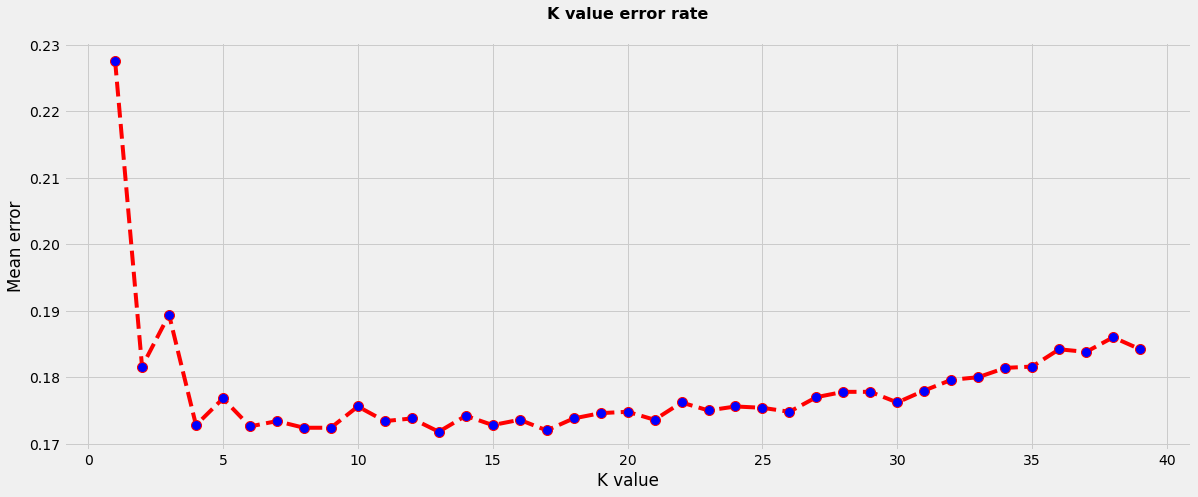

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 7))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('K value error rate\n', 
          {'fontsize': 16,'fontweight': 'bold'})
plt.xlabel('K value')
plt.ylabel('Mean error')
plt.show();

In [68]:
min(error)

0.1718

In [69]:
knn_model2 = KNeighborsClassifier(n_neighbors=13)

knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [70]:
y_predKNN2 = knn_model2.predict(X_val)

print(pd.crosstab(y_val, 
                  y_predKNN2, 
                  rownames=['Real'],
                  colnames=['Predict'], 
                  margins=True))

Predict     0    1   All
Real                    
0        3789  177  3966
1         682  352  1034
All      4471  529  5000


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
randFor_model = RandomForestClassifier(n_estimators=1_000, 
                                  random_state=0, 
                                  n_jobs=-1)

randFor_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [73]:
y_randFor = randFor_model.predict(X_val)

print(pd.crosstab(y_val,
                  y_randFor, 
                  rownames=['Real'],
                  colnames=['Predict'], 
                  margins=True))

Predict     0    1   All
Real                    
0        3808  158  3966
1         513  521  1034
All      4321  679  5000


In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_val, y_randFor))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3966
           1       0.77      0.50      0.61      1034

    accuracy                           0.87      5000
   macro avg       0.82      0.73      0.76      5000
weighted avg       0.86      0.87      0.85      5000



In [76]:
randFor_model.feature_importances_

array([0.14336004, 0.02151546, 0.22907141, 0.08671404, 0.1429019 ,
       0.0191953 , 0.03586151, 0.14508624, 0.0125606 , 0.02423837,
       0.01079007, 0.03001946, 0.05719775, 0.03384771, 0.00764014])

In [77]:
feat_importances = pd.DataFrame(randFor_model.feature_importances_, 
                                index = X_train.columns, 
                                columns=['importance']).sort_values('importance', 
                                                                    ascending=False)

feat_importances

,importance
Age,0.229071
EstimatedSalary,0.145086
CreditScore,0.143360
Balance,0.142902
Tenure,0.086714
NumOfProducts_2,0.057198
IsActiveMember,0.035862
NumOfProducts_3,0.033848
NumOfProducts_1,0.030019
Geography_Germany,0.024238


In [78]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb_model = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1.0,
    seed=0
)

xgb_model

XGBClassifier(colsample_bytree=0.8, max_depth=6, n_estimators=1000, nthread=4,
              scale_pos_weight=1.0, seed=0, subsample=0.8)

In [79]:
xgb_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, max_depth=6, n_estimators=1000, nthread=4,
              scale_pos_weight=1.0, seed=0, subsample=0.8)

In [80]:
y_predXGB = xgb_model.predict(X_val)

print(pd.crosstab(y_val, 
                  y_predXGB, 
                  rownames=['Real'],
                  colnames=['Predict'], 
                  margins=True))

Predict     0    1   All
Real                    
0        3704  262  3966
1         523  511  1034
All      4227  773  5000


In [81]:
print(classification_report(y_val, y_predXGB))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3966
           1       0.66      0.49      0.57      1034

    accuracy                           0.84      5000
   macro avg       0.77      0.71      0.73      5000
weighted avg       0.83      0.84      0.83      5000



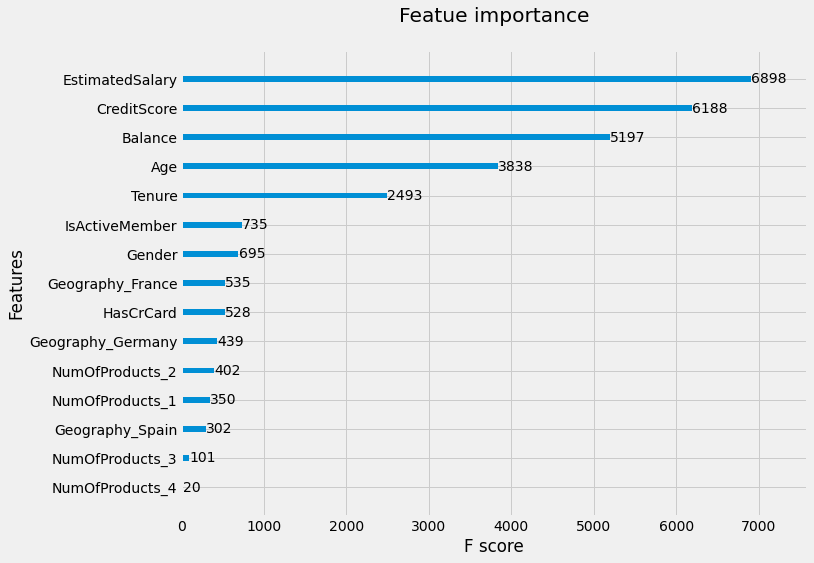

In [82]:
from xgboost.plotting import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(booster=xgb_model, ax=ax, 
                title='Featue importance\n', )
plt.show()

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
voto_model = VotingClassifier(
    estimators=[('Random forest', randFor_model), 
                ('XG Boost', xgb_model)], 
                voting='soft'
)

voto_model

VotingClassifier(estimators=[('Random forest',
                              RandomForestClassifier(n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('XG Boost',
                              XGBClassifier(colsample_bytree=0.8, max_depth=6,
                                            n_estimators=1000, nthread=4,
                                            scale_pos_weight=1.0, seed=0,
                                            subsample=0.8))],
                 voting='soft')

In [85]:
voto_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Random forest',
                              RandomForestClassifier(n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('XG Boost',
                              XGBClassifier(colsample_bytree=0.8, max_depth=6,
                                            n_estimators=1000, nthread=4,
                                            scale_pos_weight=1.0, seed=0,
                                            subsample=0.8))],
                 voting='soft')

In [86]:
y_predVOTO = voto_model.predict(X_val)

print(pd.crosstab(y_val, 
                  y_predVOTO, 
                  rownames=['Real'],
                  colnames=['Predict'], 
                  margins=True))

Predict     0    1   All
Real                    
0        3764  202  3966
1         521  513  1034
All      4285  715  5000


In [87]:
print(classification_report(y_val, y_predVOTO))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3966
           1       0.72      0.50      0.59      1034

    accuracy                           0.86      5000
   macro avg       0.80      0.72      0.75      5000
weighted avg       0.85      0.86      0.85      5000



In [88]:
df['proba'] = voto_model.predict_proba(X_final[X_train.columns])[:,1]

df[['CustomerId','proba']]

,CustomerId,proba
RowNumber,,
1,15634602,0.832008
2,15647311,0.485334
3,15619304,0.985848
4,15701354,0.017772
5,15737888,0.085480
...,...,...
9996,15606229,0.004701
9997,15569892,0.029349
9998,15584532,0.784264


In [89]:
%whos

Variable                  Type                      Data/Info
-------------------------------------------------------------
KNeighborsClassifier      ABCMeta                   <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LabelEncoder              type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
MinMaxScaler              type                      <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
RandomForestClassifier    ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
VotingClassifier          ABCMeta                   <class 'sklearn.ensemble.<...>voting.VotingClassifier'>
X                         DataFrame                            CreditScore Ge<...>[10000 rows x 10 columns]
XGBClassifier             type                      <class 'xgboost.sklearn.XGBClassifier'>
X_final                   DataFrame                            CreditScore  G<...>[10000 rows x 15 columns]
X_train                   Da

In [90]:
%who_ls 

['KNeighborsClassifier',
 'LabelEncoder',
 'MinMaxScaler',
 'RandomForestClassifier',
 'VotingClassifier',
 'X',
 'XGBClassifier',
 'X_final',
 'X_train',
 'X_val',
 'accuracy_score',
 'ax',
 'blue_',
 'categorical_vars',
 'classification_report',
 'cols',
 'continuous_vars',
 'df',
 'df_ageXexited',
 'df_copy',
 'df_genderXexited',
 'df_geographyXexited',
 'df_hasCardXexited',
 'df_isActiveXexited',
 'df_numOfProductsXexited',
 'df_select',
 'df_tenureXexited',
 'dummies_vars',
 'error',
 'feat_importances',
 'fig',
 'green_',
 'i',
 'knn_model',
 'knn_model2',
 'le',
 'loadtxt',
 'np',
 'pd',
 'plot_importance',
 'plt',
 'pred_i',
 'randFor_model',
 'red_',
 'scaler',
 'sns',
 'tts',
 'voto_model',
 'warnings',
 'x',
 'x_count',
 'xgb_model',
 'y',
 'y_predKNN',
 'y_predKNN2',
 'y_predVOTO',
 'y_predXGB',
 'y_randFor',
 'y_train',
 'y_val']